# Take Home Challenge # 1

### Part One

In [1]:
#import login file 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

login = pd.read_json('logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [2]:
#import challenge file
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
login.shape

(93142, 1)

In [4]:
df.shape

(50000, 12)

In [5]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [7]:
login.set_index('login_time', inplace=True)
login['total'] = 1
login.sort_index(inplace=True)
login_agg = login.resample("15min").sum()

In [8]:
login_agg

,total
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


<AxesSubplot:xlabel='login_time'>

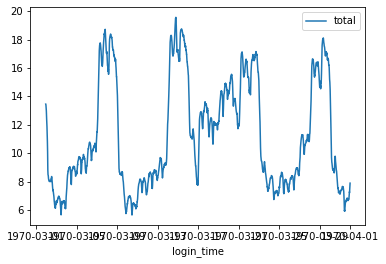

In [9]:
#plot data for March
sns.lineplot(data=login_agg.loc['1970-03'].rolling(window=90).mean()) 

<AxesSubplot:xlabel='login_time'>

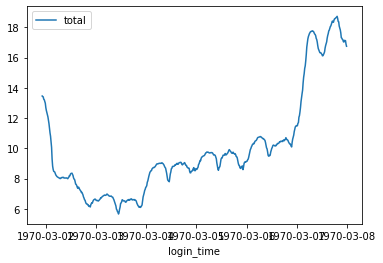

In [10]:
#plot data for the day of the week 
sns.lineplot(data=login_agg.loc['1970-03-01':'1970-03-07'].rolling(window=90).mean()) 

Demand shows to be higher on March 7 and March 8. Those dates happend to fall on a weekend (Saturday and Sunday). 

<AxesSubplot:xlabel='login_time'>

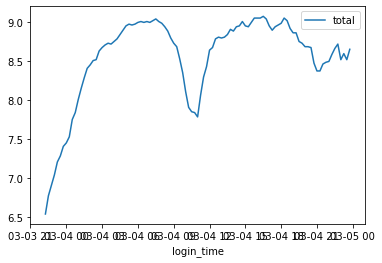

In [11]:
sns.lineplot(data=login_agg.loc['1970-03-03':'1970-03-04'].rolling(window=90).mean()) 

<AxesSubplot:xlabel='login_time'>

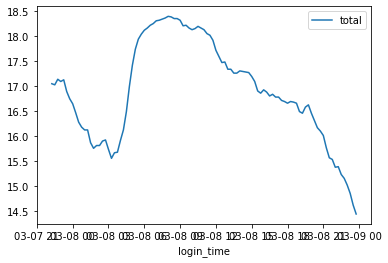

In [12]:
#plot data for march 7th and 8th
sns.lineplot(data=login_agg.loc['1970-03-07':'1970-03-08'].rolling(window=90).mean()) 

In [13]:
print(login_agg['1970-03-07':'1970-03-08']== 51)

                     total
login_time                
1970-03-07 00:00:00  False
1970-03-07 00:15:00  False
1970-03-07 00:30:00  False
1970-03-07 00:45:00  False
1970-03-07 01:00:00  False
...                    ...
1970-03-08 22:45:00  False
1970-03-08 23:00:00  False
1970-03-08 23:15:00  False
1970-03-08 23:30:00  False
1970-03-08 23:45:00  False

[192 rows x 1 columns]


Demand seems to be higher around early noon (around 11:00am) to early afternoon (around 1pm)

#### Findings

Demand is usally higher on the weekends around noon

### Part Two

Looking at the data provided:
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
   -  Metrics that can used would be the revenue of both cities and perctange of drivers that drive to a popular city. These metrics can be chosen because these metrics can show how much of an increase it is when Ulimate pays a toll. 
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment
   - This experiment can be implemented by estimating what percentage of drivers actually cross the bridge and pay the toll. 
    
    b. what statistical test(s) you will conduct to verify the significance of the observation
    - A train/test split will be performed
    - Logistic Regression, Random Forrest Classifier, and Gradient Boosting would done
    
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    - if there is a change in percentage of drivers that cross the city then, then we would know that there is an importance of paying toll. If this is the case, I would recommend the change of paying driver's fees. More analysis, however, should be done company's addtional factors and competitors. 

### Part Three

In [14]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [15]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

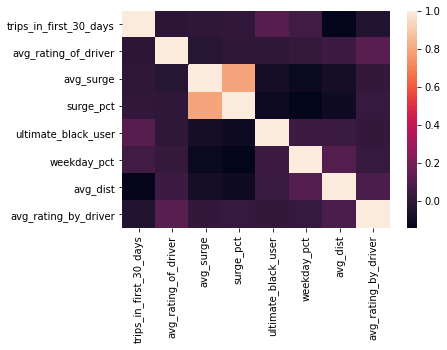

In [19]:
corr = df.corr()
ax = sns.heatmap(corr)
plt.show()

In [20]:
df.count() #null values are present in avg_rating_of_driver, phone, and average rating by driver

city                      50000
trips_in_first_30_days    50000
signup_date               50000
avg_rating_of_driver      41878
avg_surge                 50000
last_trip_date            50000
phone                     49604
surge_pct                 50000
ultimate_black_user       50000
weekday_pct               50000
avg_dist                  50000
avg_rating_by_driver      49799
dtype: int64

In [21]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [22]:
50000-(34582+15022) # number of None values in the phone column

396

In [23]:
df['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [24]:
df['avg_rating_of_driver'].unique()

array([4.7, 5. , 4.3, 4.6, 4.4, 3.5, nan, 4.5, 4. , 3.9, 4.9, 4.8, 2.5,
       3.7, 1. , 4.1, 4.2, 3. , 3.8, 2. , 2.7, 3.3, 2.8, 3.6, 3.4, 3.2,
       2.6, 3.1, 2.9, 1.7, 1.8, 1.5, 2.3, 1.9, 2.1, 2.4, 1.6, 2.2])

In [25]:
df.phone.fillna('iPhone', inplace=True)
df.phone.value_counts() #replace with iPhone

iPhone     34978
Android    15022
Name: phone, dtype: int64

In [26]:
df.avg_rating_of_driver.fillna(5.0, inplace=True)
df.avg_rating_of_driver.value_counts()

5.0    28893
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.8        2
1.7        2
2.2        1
1.6        1
1.9        1
Name: avg_rating_of_driver, dtype: int64

In [27]:
df['avg_rating_by_driver'].unique()

array([5. , 4.9, 4. , 3. , 4.8, 4.7, 4.5, 4.2, nan, 4.4, 4.6, 3.7, 4.3,
       3.5, 2. , 3.8, 2.5, 4.1, 3.9, 1. , 3.3, 3.4, 3.6, 3.2, 2.3, 2.8,
       1.5, 2.7])

In [28]:
df['avg_rating_by_driver'].value_counts() #replace with 5.0

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
3.2        2
2.7        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

In [29]:
df.avg_rating_by_driver.fillna(0.0, inplace=True)
df.avg_rating_by_driver.value_counts() #replace with 0

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
0.0      201
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
2.7        2
3.2        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

In [30]:
df.count()# null values are replaced

city                      50000
trips_in_first_30_days    50000
signup_date               50000
avg_rating_of_driver      50000
avg_surge                 50000
last_trip_date            50000
phone                     50000
surge_pct                 50000
ultimate_black_user       50000
weekday_pct               50000
avg_dist                  50000
avg_rating_by_driver      50000
dtype: int64

In [31]:
df.dtypes #city, phone and ultimate black user need to be replaced with numerical values

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [32]:
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,5.0,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


In [33]:
#One Hot Encoding on the Species Column 
df = pd.get_dummies(df, columns=['city','phone','ultimate_black_user'], prefix='A')
df

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained,A_Astapor,A_King's Landing,A_Winterfell,A_Android,A_iPhone,A_False,A_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.0,1.00,2014-06-05,0.0,100.0,5.63,4.2,1,0,1,0,0,1,1,0
49996,1,2014-01-24,5.0,1.00,2014-01-25,0.0,0.0,0.00,4.0,0,1,0,0,0,1,1,0
49997,0,2014-01-31,5.0,1.00,2014-05-22,0.0,100.0,3.86,5.0,0,0,0,1,1,0,0,1
49998,2,2014-01-14,3.0,1.00,2014-01-15,0.0,100.0,4.58,3.5,0,1,0,0,0,1,1,0


In [34]:
df['trip_date_month']=df['last_trip_date'].apply(lambda x : x.month)
df['trip_date_month'].value_counts()

6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: trip_date_month, dtype: int64

In [35]:
df.dtypes

trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
surge_pct                        float64
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
was_retained                       int64
A_Astapor                          uint8
A_King's Landing                   uint8
A_Winterfell                       uint8
A_Android                          uint8
A_iPhone                           uint8
A_False                            uint8
A_True                             uint8
trip_date_month                    int64
dtype: object

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import preprocessing

In [37]:
#modeling
X = df.drop(['was_retained','last_trip_date','signup_date'], axis=1)
y = df['was_retained']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

[[7695   30]
 [  19 4756]]
0.99608
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7725
           1       0.99      1.00      0.99      4775

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

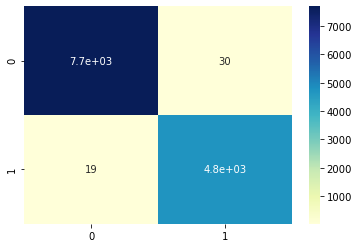

In [38]:
#Logistic Regresion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions_logreg=logreg.predict(X_test)

print(confusion_matrix(y_test, predictions_logreg))
print(accuracy_score(y_test, predictions_logreg))
print(classification_report(y_test, predictions_logreg))

sns.heatmap(confusion_matrix(y_test, predictions_logreg),annot=True,cmap ="YlGnBu")

[[7725    0]
 [   0 4775]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7725
           1       1.00      1.00      1.00      4775

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



[Text(0.5, 1.0, 'Confusion Matrx of a Random Classifier Model')]

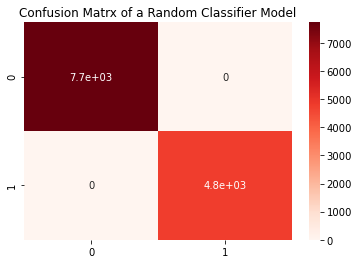

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = rfc.fit(X_train, y_train)
predictions_rfc = model_res.predict(X_test)
print(confusion_matrix(y_test, predictions_rfc))
print(accuracy_score(y_test, predictions_rfc))
print(classification_report(y_test, predictions_rfc))

sns.heatmap(confusion_matrix(y_test, predictions_rfc),annot=True,cmap ="Reds").set(title='Confusion Matrx of a Random Classifier Model')

[[7725    0]
 [   0 4775]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7725
           1       1.00      1.00      1.00      4775

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



[Text(0.5, 1.0, 'Confusion Matrx of a Gradient Boosting Model')]

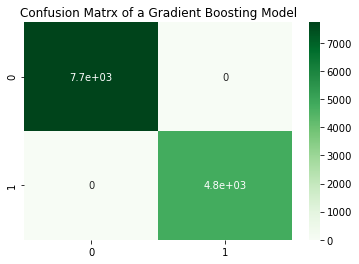

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 20, random_state = 0)
gb.fit(X_train, y_train)
predictions_gb = gb.predict(X_test)

print(confusion_matrix(y_test, predictions_gb))
print(classification_report(y_test, predictions_gb))

sns.heatmap(confusion_matrix(y_test, predictions_gb),annot=True,cmap ="Greens").set(title='Confusion Matrx of a Gradient Boosting Model')

In [41]:
from sklearn.metrics import roc_auc_score
print("Logistic Regression: %.2f%%" % (roc_auc_score(y_test, predictions_logreg) * 100.0))
print("Random Forrest Classifier: %.2f%%" % (roc_auc_score(y_test, predictions_rfc) * 100.0))
print("Gradient Boosting: %.2f%%" % (roc_auc_score(y_test, predictions_gb) * 100.0))

Logistic Regression: 99.61%
Random Forrest Classifier: 100.00%
Gradient Boosting: 100.00%


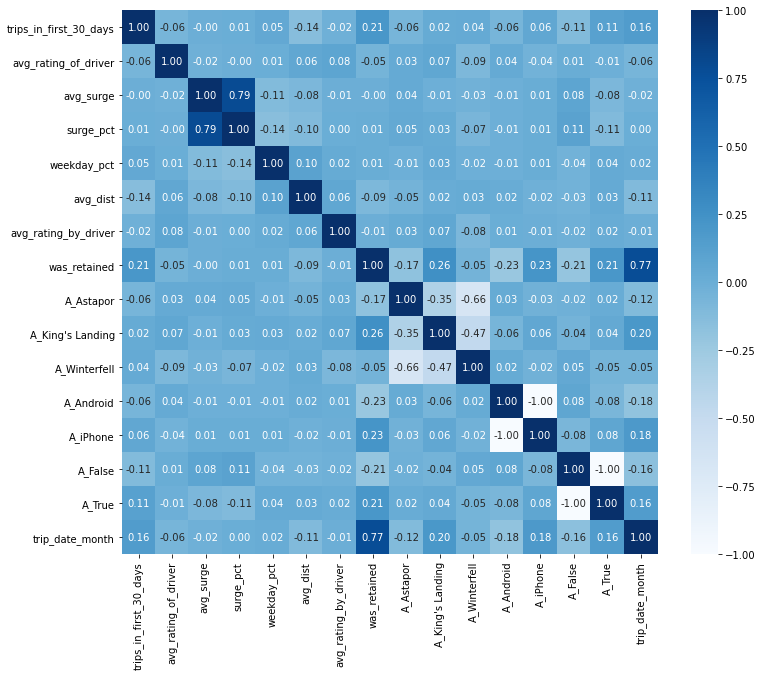

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap ='Blues')
plt.show()

In [43]:
import collections
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import traceback
import re
import string
import warnings

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    #print("justmiss", justmiss)
    #print("notmiss", notmiss)
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            #print("I am here 1",r, n,len(d2))
            n = n - 1 
            
        except Exception as e:
            n = n - 1
            #print("I am here e",n)

    if len(d2) == 1:
        #print("I am second step ",r, n)
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        #print(justmiss.count().Y)
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    print(np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT))
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    #print("hi",d3.IV )
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    for i in x:
        print(i)
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                #print("Number and unique value greater than 2")
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                #print("I am here 2")
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [44]:
final_iv, IV = data_vars(X_train, y_train)

trips_in_first_30_days
0   -0.367085
1   -0.017593
2    0.754247
dtype: float64
avg_rating_of_driver
0   -0.979869
1    0.004171
dtype: float64
avg_surge
0   -0.423756
1    0.836870
dtype: float64
surge_pct
0   -0.424696
1    0.837441
dtype: float64
weekday_pct
0    0.119362
1   -0.135134
dtype: float64
avg_dist
0    0.080127
1   -0.081875
dtype: float64
avg_rating_by_driver
0   -1.347738
1    0.008385
dtype: float64
A_Astapor
A_King's Landing
A_Winterfell
A_Android
A_iPhone
A_False
A_True
trip_date_month
0        -inf
1    0.910566
2         inf
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [45]:
#features = list(IV[(IV['IV'] >= 0.02) & (IV['IV'] <= 0.8)]['VAR_NAME'])
features = list(IV[(IV['IV'] >= 0.02) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

(37500, 10)

,A_Android,A_Astapor,A_False,A_King's Landing,A_True,A_iPhone,avg_surge,surge_pct,trip_date_month,trips_in_first_30_days
25772,1,1,0,0,1,0,1.00,0.0,1,1
45791,1,0,1,0,0,0,1.25,50.0,1,2
25396,0,0,1,1,0,1,1.13,16.7,6,2
43835,0,0,1,0,0,1,1.00,0.0,1,1
15782,1,0,1,0,0,0,1.09,12.5,3,5


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns
        
        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max()
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor')  

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Iteration # 1
Removing A_Android with VIF of inf
Iteration # 2
Removing A_False with VIF of 41.954215
Iteration # 3
Removing avg_surge with VIF of 8.264735
Iteration # 4
Complete
